# Importing Libraries

In [2]:
## Importing pandas
import pandas as pd

## Importing numpy
import numpy as np

## Importing nlp:
import nltk
import re

## Importing the snowball stemmer:
from nltk.stem.snowball import SnowballStemmer

## Importing the stopwords library:
from nltk.corpus import stopwords

## Importing the worldcloud library
import wordcloud

## Importing the image library:
from PIL import Image

## Importing matplotlib
import matplotlib.pyplot as plt

## Import the FreqDist function from the nltk library:
from nltk.probability import FreqDist

# Download NLTK corpus/dictionaries

In [3]:
## Download NLTK corpus
nltk.download('punkt') # Dictionary of punctuation
nltk.download('stopwords') # Dictionary of stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Preprocessing

## Reading and Exploring the Dataset

In [4]:
## Reading the Dataset:
movies_df = pd.read_csv('movies.csv')

In [5]:
movies_df

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


## Working on the Dataset

In [6]:
## Combining both the wiki and the imdb plots together into a single coloumn called plot:
movies_df['plot'] = movies_df['wiki_plot'].astype(str) + '\n' + movies_df['imdb_plot'].astype(str)

In [7]:
movies_df

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...
...,...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...


## Tokenization and Stemming

In [8]:
## Defining a function to perform tokenization and stemming
def tokenize_and_stem(text):

  # Tokenize by sentence and then by word:
  tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

  # Remove tokens that do not have letters:
  raw_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

  # Remove stopwords:
  ## Initialize the stopword function:
  en_stop = set(stopwords.words('english'))
  filtered_tokens = [token for token in raw_tokens if not token in en_stop]

  ## Stem the tokens:
  ## Initialize the stemmer:
  stemmer = SnowballStemmer('english')
  stems = [stemmer.stem(token) for token in filtered_tokens]

  return stems

# Exploring the Preprocessing Output

## Wordcloud

### Formulating Wordcloud

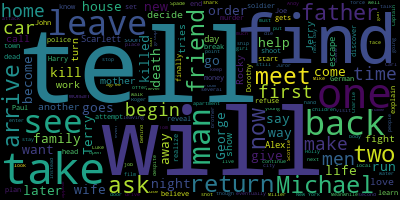

In [9]:
## Join the different plots together into a long string:
long_string = ''.join(movies_df['plot'])

## Instance the world cloud object:
wordcloud_1 = wordcloud.WordCloud()

## Generate Wordcloud from text or from the long string that has just formed:
wordcloud_1.generate(long_string)

## Visualizing the wordcloud:
wordcloud_1.to_image()

### Apply the Wordcloud to mask

In [11]:
## Read the mask image:
projector_mask = np.array(Image.open('projector.png'))

## Applying the loaded mask to the word cloud:

## Instancing the wordcloud:
wc = wordcloud.WordCloud(background_color='white',
                         max_words=2000,
                         mask=projector_mask,
                         contour_width=0)

## Generating the wordcloud
wc.generate(long_string)

### Plotting the Wordcloud

<Figure size 432x288 with 0 Axes>

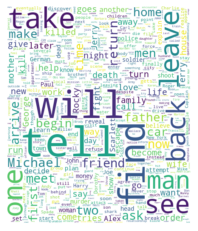

<Figure size 432x288 with 0 Axes>

In [12]:
## Plotting the wc
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.figure()

## Identifying Common Words

In [13]:
## We are going to use the long string that we combined from above to fined the most common words in all of the texts:

## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullText = tokenize_and_stem(long_string)

## Calculate the frequency distribution of the words:
fdist = FreqDist(StemmedFullText)

## Create a Dataframe with the content:
most_common = pd.DataFrame(fdist.most_common(n=10), columns=['Word', 'Frequency'])

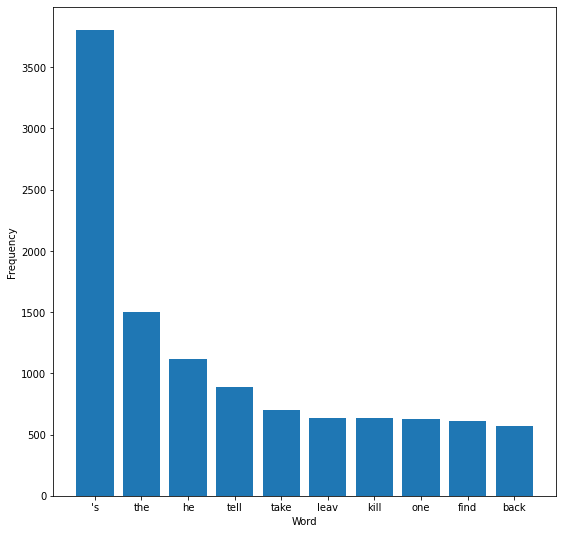

In [15]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common.iloc[:,0], most_common.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

# Modelling/Measuring Text Similarity

## TF-IDF Vectorizor

In [16]:
## Importing the library:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
## Instancing the vectorizer object:

tfidf = TfidfVectorizer(max_df = 0.8,
                        min_df = 0.2,
                        max_features = 200000,
                        stop_words = 'english',
                        use_idf = True,
                        tokenizer = tokenize_and_stem,
                        ngram_range=(1,3))

tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8,
                max_features=200000, min_df=0.2, ngram_range=(1, 3), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words='english',
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize_and_stem at 0x7fc81e6f8c20>,
                use_idf=True, vocabulary=None)

In [18]:
## Fit and transform with the movie plots

tfidf_matrix = tfidf.fit_transform([x for x in movies_df['plot']])

tfidf_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<100x552 sparse matrix of type '<class 'numpy.float64'>'
	with 19326 stored elements in Compressed Sparse Row format>

In [19]:
## Exploring the matrix:
tfidf_matrix[0:5]

<5x552 sparse matrix of type '<class 'numpy.float64'>'
	with 1087 stored elements in Compressed Sparse Row format>

## Measuring Cosine Similarity - Similarity Distance

In [20]:
## Importing the relevant library:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
## Applying the cosine similarity and calculating the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

print(similarity_distance.shape)

(100, 100)


In [22]:
## Presenting the similarity distance between documents
distance = pd.DataFrame(similarity_distance)

distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-2.220446e-16,8.021136e-01,7.681585e-01,7.597603e-01,7.387999e-01,0.802449,0.582079,0.740708,0.723615,0.874826,0.768239,0.378002,0.672454,0.731835,0.747665,0.628333,0.688087,0.760209,0.755703,0.745250,0.706831,0.798631,0.742744,0.730983,0.769010,0.903517,0.871262,0.748237,0.753807,0.798283,0.708705,0.776235,0.786331,0.757598,0.561429,0.716262,0.598831,0.727063,0.778609,0.797550,...,0.684172,0.717119,0.772710,0.685469,0.809043,0.721584,0.697236,0.846510,0.740169,0.791514,0.649475,0.786756,0.744744,0.778309,0.683372,0.747864,0.643622,0.536713,0.640723,0.770397,0.807762,0.789267,0.826980,0.789437,0.780614,0.758576,0.641918,0.796569,0.801845,0.831187,0.635231,0.745473,0.731004,0.800920,0.666563,6.636784e-01,0.775623,6.409778e-01,6.725516e-01,8.240976e-01
1,8.021136e-01,-2.220446e-16,7.349759e-01,8.265509e-01,7.687451e-01,0.707093,0.736738,0.810637,0.778484,0.871861,0.784278,0.770666,0.723219,0.794170,0.762866,0.719558,0.803284,0.867222,0.805773,0.766027,0.805294,0.799823,0.668516,0.800916,0.574740,0.889108,0.891881,0.760903,0.817645,0.845537,0.839781,0.839432,0.792844,0.807641,0.788163,0.750633,0.750173,0.774768,0.767571,0.784722,...,0.811942,0.639154,0.852269,0.774705,0.826781,0.877370,0.836930,0.906180,0.814159,0.860152,0.798804,0.846948,0.776119,0.774566,0.858017,0.792739,0.716594,0.856975,0.806580,0.871373,0.706810,0.836000,0.876844,0.839320,0.803656,0.836338,0.771645,0.836946,0.763070,0.850687,0.723630,0.530189,0.799075,0.836117,0.814979,8.809728e-01,0.818525,7.346303e-01,7.720361e-01,8.926650e-01
2,7.681585e-01,7.349759e-01,-2.220446e-16,8.206237e-01,7.174168e-01,0.792735,0.610751,0.774168,0.784758,0.836374,0.642981,0.713188,0.765164,0.790805,0.795870,0.796628,0.763873,0.882420,0.829402,0.707317,0.806473,0.794071,0.816511,0.814417,0.620276,0.858890,0.850900,0.722606,0.804970,0.711959,0.858023,0.738092,0.711625,0.669209,0.738385,0.715752,0.713035,0.740933,0.659638,0.785096,...,0.846332,0.632010,0.717234,0.741953,0.892346,0.839921,0.867646,0.908852,0.755753,0.816753,0.835001,0.886232,0.750771,0.796420,0.811356,0.771560,0.786547,0.682675,0.612530,0.839993,0.796186,0.732019,0.800110,0.859954,0.856813,0.850554,0.657632,0.818035,0.750096,0.803300,0.801088,0.794360,0.779219,0.848421,0.807220,9.003314e-01,0.822437,7.277405e-01,7.551067e-01,8.588862e-01
3,7.597603e-01,8.265509e-01,8.206237e-01,-4.440892e-16,8.306278e-01,0.827877,0.720738,0.688320,0.877700,0.875658,0.866734,0.533025,0.812420,0.765893,0.807955,0.654607,0.841252,0.925135,0.751247,0.866497,0.790618,0.779452,0.870138,0.873378,0.874685,0.841873,0.898999,0.788346,0.778201,0.828642,0.879844,0.891309,0.733679,0.833580,0.781762,0.669325,0.697576,0.832344,0.814521,0.613863,...,0.799153,0.791184,0.794423,0.753857,0.864289,0.745284,0.824077,0.917308,0.740554,0.860816,0.628152,0.672770,0.801427,0.787583,0.719400,0.727254,0.789663,0.785805,0.849103,0.777157,0.799519,0.862277,0.821681,0.806230,0.766449,0.796170,0.722565,0.817577,0.757962,0.903388,0.821471,0.781831,0.748156,0.816654,0.823963,8.211040e-01,0.798238,7.701310e-01,7.766173e-01,8.795971e-01
4,7.387999e-01,7.687451e-01,7.174168e-01,8.306278e-01,-4.440892e-16,0.698846,0.666393,0.757632,0.742492,0.881100,0.729667,0.743539,0.715728,0.703636,0.757573,0.753404,0.792825,0.807961,0.656066,0.728572,0.718499,0.801556,0.764232,0.757097,0.708589,0.806535,0.893287,0.697854,0.833652,0.701568,0.793448,0.743450,0.770310,0.776652,0.694708,0.603854,0.688114,0.794845,0.685760,0.814899,...,0.789087,0.641843,0.786006,0.704594,0.880066,0.838839,0.814082,0.908184,0.849763,0.858673,0.785126,0.806783,0.761542,0.718420,0.800699,0.764899,0.733276,0.770865,0.791594,0.801093,0.872301,0.769414,0.888100,0.712399,0.752100,0.834545,0.719734,0.814195,0.689863,0.843818,0.674682,0.784818,0.738854,0.823302,0.619893,7.825573e-0

# Clustering - Exploring Text Similarity

## Hierarchical Clustering - Dendrograms

In [23]:
## Importing relevant libraries:
from scipy.cluster.hierarchy import linkage, dendrogram

In [24]:
## Create a mergings matrix
mergings = linkage(similarity_distance, method = 'complete')

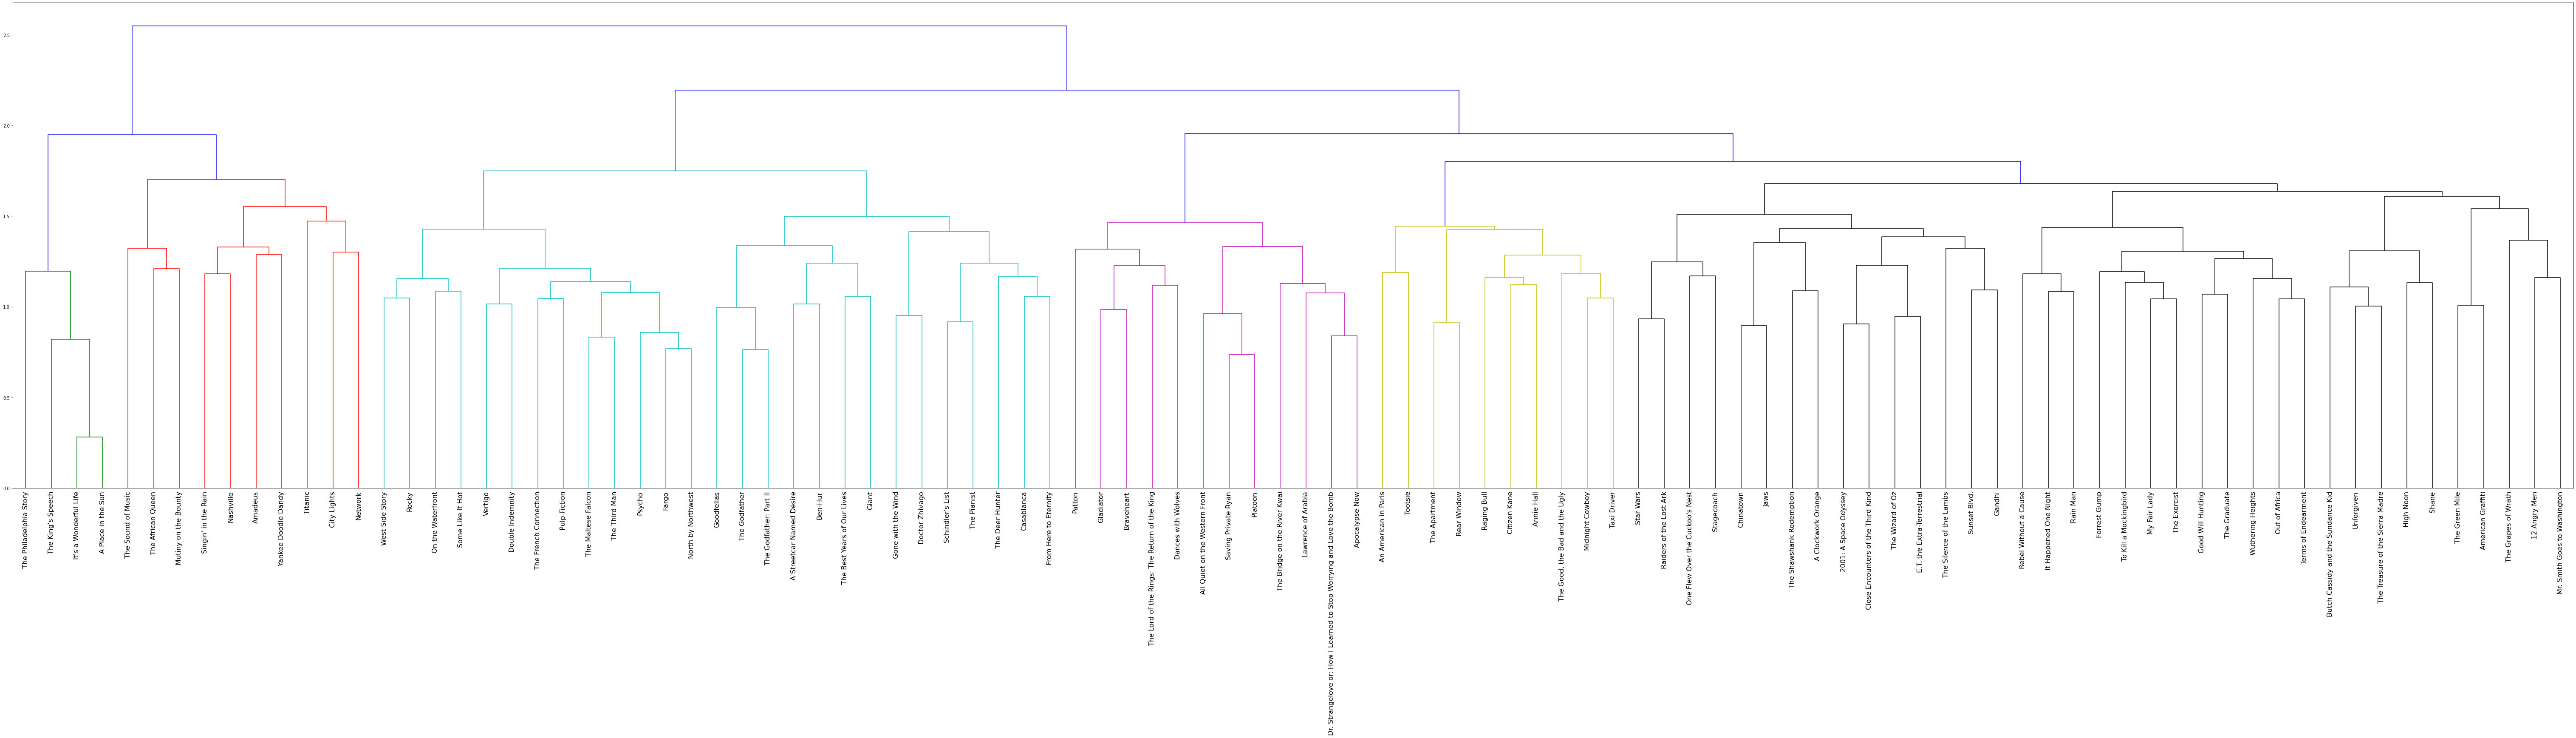

In [25]:
## Creating the dendrogram
dendrogram_plot = dendrogram(mergings,
                             labels=[x for x in movies_df['title']],
                             leaf_rotation=90,
                             leaf_font_size=16)
## Plot dendrogram:
fig = plt.gcf()
fig.set_size_inches(108,21)
plt.show()

## K-means Clustering

In [26]:
## Importing the relevant libraries:
from sklearn.cluster import KMeans

In [27]:
## Instancing a KMeans with a default of 5 clusters:
km = KMeans(n_clusters=5)

In [28]:
## Fitting the K-Means with the tf-idf matrix:
km.fit(tfidf_matrix)

## Creating clusters:
clusters = km.labels_.tolist()
clusters

[2,
 2,
 2,
 4,
 0,
 3,
 3,
 4,
 0,
 4,
 3,
 2,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 2,
 0,
 3,
 4,
 1,
 0,
 0,
 3,
 4,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 2,
 1,
 0,
 1,
 4,
 0,
 2,
 2,
 3,
 0,
 3,
 4,
 3,
 3,
 0,
 3,
 2,
 3,
 2,
 2,
 4,
 3,
 3,
 0,
 2,
 1,
 4,
 1,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 3,
 3,
 0,
 2,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4]

In [29]:
## Create a column cluster in the original dataset:
movies_df['cluster'] = clusters

movies_df

,rank,title,genre,wiki_plot,imdb_plot,plot,cluster
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...",2
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...",2
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...",2
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...",4
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,0
...,...,...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...,0
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,0
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...,0
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...,0


In [30]:
## Displaying the number of movies per cluster:
movies_df['cluster'].value_counts()

0    32
3    22
4    21
2    19
1     6
Name: cluster, dtype: int64

## K-means clustering analysis

### Cluster 0

In [31]:
## Seeing the clusters:
movies_cluster_0 = movies_df[movies_df['cluster']==0]

In [53]:
## Analysing the cluster genre:
genre_string = ''.join(movies_cluster_0['genre'])
genre_string = genre_string.replace("u", " ")

In [54]:
## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullGenre = tokenize_and_stem(genre_string)

## Calculate the frequency distribution of the words:
fdist_genre = FreqDist(StemmedFullGenre)

## Create a Dataframe with the content:
most_common_genre = pd.DataFrame(fdist_genre.most_common(n=10), columns=['Word', 'Frequency'])
most_common_genre

,Word,Frequency
0,drama,21
1,thriller,12
2,mysteri,8
3,romanc,7
4,crime,7
5,famili,3
6,m,3
7,sical,3
8,sci-fi,3
9,comedi,3


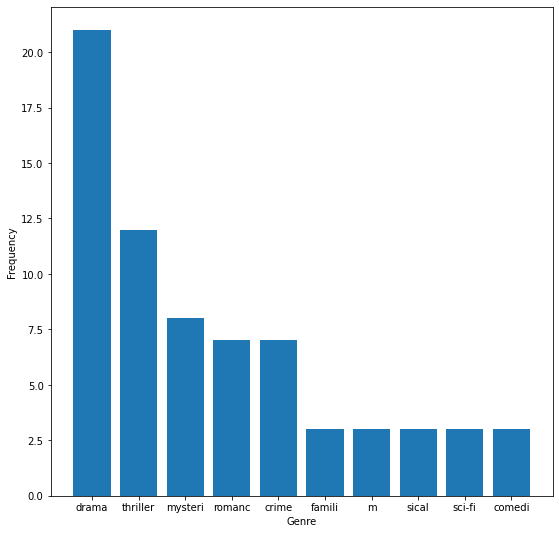

In [55]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common_genre.iloc[:,0], most_common_genre.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

### Cluster 1

In [56]:
## Seeing the clusters:
movies_cluster_1 = movies_df[movies_df['cluster']==1]

In [57]:
## Analysing the cluster genre:
genre_string = ''.join(movies_cluster_1['genre'])
genre_string = genre_string.replace("u", " ")

In [58]:
## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullGenre = tokenize_and_stem(genre_string)

## Calculate the frequency distribution of the words:
fdist_genre = FreqDist(StemmedFullGenre)

## Create a Dataframe with the content:
most_common_genre = pd.DataFrame(fdist_genre.most_common(n=10), columns=['Word', 'Frequency'])
most_common_genre

,Word,Frequency
0,drama,4
1,romanc,4
2,comedi,2
3,famili,1
4,fantasi,1
5,m,1
6,sical,1
7,biographi,1
8,histori,1


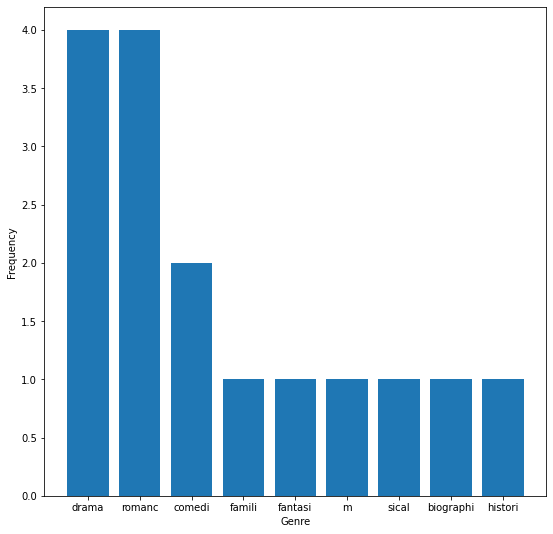

In [59]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common_genre.iloc[:,0], most_common_genre.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

### Cluster 2

In [60]:
## Seeing the clusters:
movies_cluster_2 = movies_df[movies_df['cluster']==2]

In [61]:
## Analysing the cluster genre:
genre_string = ''.join(movies_cluster_2['genre'])
genre_string = genre_string.replace("u", " ")

In [62]:
## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullGenre = tokenize_and_stem(genre_string)

## Calculate the frequency distribution of the words:
fdist_genre = FreqDist(StemmedFullGenre)

## Create a Dataframe with the content:
most_common_genre = pd.DataFrame(fdist_genre.most_common(n=10), columns=['Word', 'Frequency'])
most_common_genre

,Word,Frequency
0,drama,18
1,crime,7
2,biographi,4
3,romanc,4
4,war,2
5,comedi,2
6,histori,1
7,thriller,1
8,advent,1
9,western,1


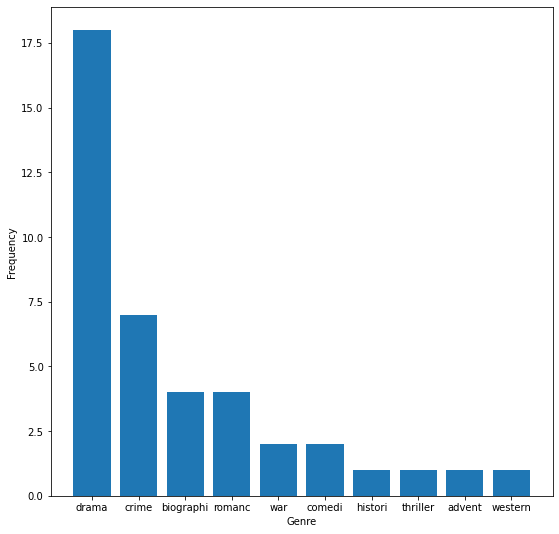

In [63]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common_genre.iloc[:,0], most_common_genre.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

### Cluster 3

In [64]:
## Seeing the clusters:
movies_cluster_3 = movies_df[movies_df['cluster']==3]

In [65]:
## Analysing the cluster genre:
genre_string = ''.join(movies_cluster_3['genre'])
genre_string = genre_string.replace("u", " ")

In [66]:
## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullGenre = tokenize_and_stem(genre_string)

## Calculate the frequency distribution of the words:
fdist_genre = FreqDist(StemmedFullGenre)

## Create a Dataframe with the content:
most_common_genre = pd.DataFrame(fdist_genre.most_common(n=10), columns=['Word', 'Frequency'])
most_common_genre

,Word,Frequency
0,drama,16
1,war,12
2,advent,9
3,action,6
4,biographi,4
5,western,4
6,histori,3
7,romanc,2
8,fantasi,2
9,sci-fi,1


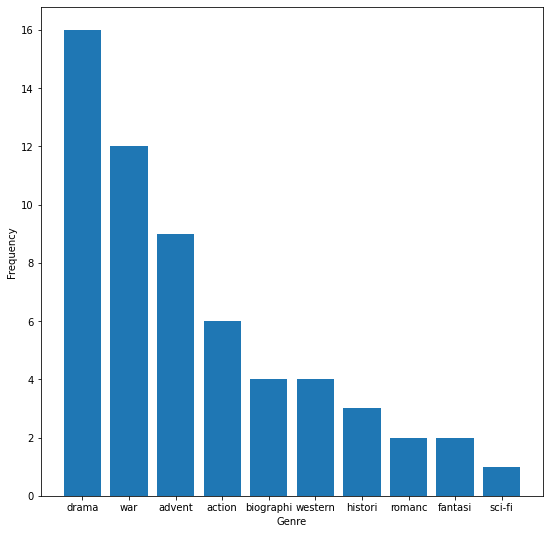

In [67]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common_genre.iloc[:,0], most_common_genre.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

### Cluster 4

In [47]:
## Seeing the clusters:
movies_cluster_4 = movies_df[movies_df['cluster']==4]

In [48]:
## Analysing the cluster genre:
genre_string = ''.join(movies_cluster_4['genre'])
genre_string = genre_string.replace("u", " ")

In [49]:
## But first we need to tokenize the whole string and then stemm it - using the tokenize_and_stem function:
StemmedFullGenre = tokenize_and_stem(genre_string)

## Calculate the frequency distribution of the words:
fdist_genre = FreqDist(StemmedFullGenre)

## Create a Dataframe with the content:
most_common_genre = pd.DataFrame(fdist_genre.most_common(n=10), columns=['Word', 'Frequency'])
most_common_genre

,Word,Frequency
0,drama,16
1,romanc,9
2,m,5
3,biographi,4
4,comedi,4
5,sical,3
6,sic,2
7,war,2
8,sport,1
9,mysteri,1


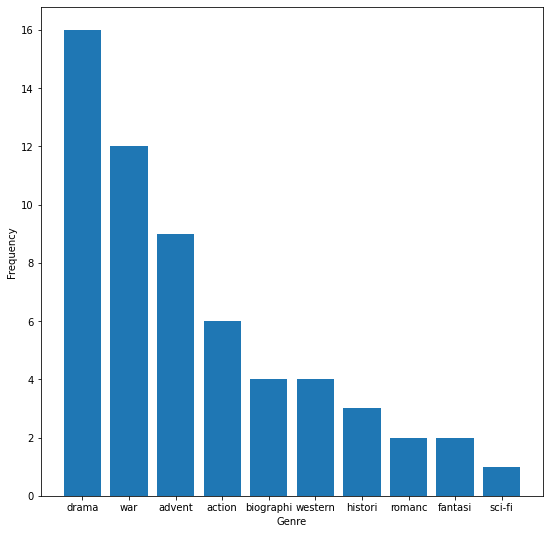

In [68]:
## Creating a bar plot with the frequency of words:
fig = plt.bar(most_common_genre.iloc[:,0], most_common_genre.iloc[:,1])

## Adding labels and titles to the figure:
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (9,9)

# Model Deployment - Latent Dirichlet Allocation (LDA)

## CountVectorizer

In [69]:
## Importing the needed libraries:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
## Instancing the count vectorizor:
count_vectorizer = CountVectorizer(max_df=0.7,
                                   min_df=0.2,
                                   stop_words='english')

In [71]:
## Fit and transform the plots of the processed titles:
count_data = count_vectorizer.fit_transform(movies_df['plot'])

## LDA Model Application - Coherence Analysis

### Importing libraries and function formulation

In [72]:
## Importing warnings and needed libraries:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

## Importing the LDA model from sklearn:
from sklearn.decomposition import LatentDirichletAllocation as LDA 

In [73]:
# Create function to print the topics main words
def print_topics(model, count_vectorizer, n_top_words):
  words = count_vectorizer.get_feature_names()
  for topic_idx, topic in enumerate(model.components_):
    print('\nTopic #%d:' % topic_idx)
    print(' '.join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

### Creating the Model

In [74]:
## Select the parameters for the model:
number_topics = 3
number_words = 15

## Instancing and fitting the LDA model:
lda = LDA(n_components=number_topics)
topic_list = lda.fit_transform(count_data)

## Print the topics found by the LDA model:
print('Topics found via LDA:')
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
george police car john asks day goes says tries apartment house mr room father wife

Topic #1:
family father war mother children brother way years love returns film son return daughter young

Topic #2:
men killed war army water orders soldiers death don attack general dead group town kill
